# Differential Equations

We are looking at seperable equations for now.

Ex. Find the unique solution of $y' = -y , y(0)=1$

$$
y'=-y
$$
$$
\int \frac{-1}{y}dy = \int dt
$$
$$
-\log(y) = t + C
$$
Plug in $y(0)=1$
$$
-\log(1) = 0 + C
$$
so we have $C = 0$. Thus
$$
-\log(y) = t
$$
and we conclude
$$
y(t) = e^{-t}.
$$

Ex. Find the solution of $y' = y^2\cos(t^2)$ for $y(0)=0$.

We cannot integrate $\cos(t^2)$ using conventional methods so we cannot apply the seperable method.

### We are assuming the differential equations we come across are not solvable.

Now we do some slope fields

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t,y):
    return -y

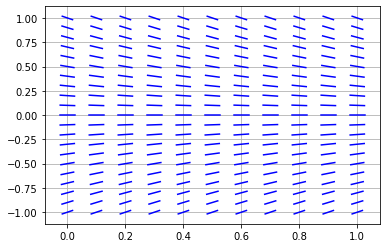

In [8]:
h = 0.1
L = 0.025
t_grid = np.arange(0,1+h,h)
y_grid = np.arange(-1,1+h,h)
for t in  t_grid:
    for y in y_grid:
        m = f(t,y)
        theta = np.arctan(m)
        plt.plot([t - L*np.cos(theta),t + L*np.cos(theta)],
                [y - L*np.sin(theta), y + L*np.sin(theta)], 'b')
        plt.grid(True)

## Otra dia dame dollar

Write a function called `euler` which takes input parameters `f`,`t`,and `y0` where `f` if a python functions of two variables representing the RHS of a first order ODE, `t` is a python list or numpy array of `t` values where we approximate corresponding `y` values by Euler's method, and `y0` is the initial condition $y(t_0) = y_0$ where $t_0$ is the entry at index 0 of t.

In [5]:
def euler(f,t,y0):
    N = len(t)
    y = np.zeros(N)
    y[0] = y0
    for n in range(0,N-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1]-t[n])
    return y

**Exercise 1** Consider  $y' = -y, y(0) = 1$. Approximate $y(0.5)$ using Euler's method using step size $h = 0.1$.

In [9]:
def f(t,y):
    return -y

t = [0,0.1,0.2,0.3,0.4,0.5]

y0 = 1

y = euler(f,t,y0)
print(y)

[1.      0.9     0.81    0.729   0.6561  0.59049]


Compute the error at $t=0.5$

In [10]:
np.abs(np.exp(-0.5)-y[5])

0.016040659712633354

Write a function called `ieuler` which takes input parameters `f`,`t`,and `y0` where `f` if a python functions of two variables representing the RHS of a first order ODE, `t` is a python list or numpy array of `t` values where we approximate corresponding `y` values by Euler's method, and `y0` is the initial condition $y(t_0) = y_0$ where $t_0$ is the entry at index 0 of t.

Return `y`, the approximated values of the solution using the Improved Euler Method.

In [13]:
def ieuler(f,t,y0):
    N = len(t)
    y = np.zeros(N)
    y[0] = y0
    for n in range(0,N-1):
        yt = y[n] + f(t[n],y[n])*(t[n+1]-t[n])
        y[n+1] = y[n]+((f(t[n],y[n])+f(t[n+1],yt))/2)*(t[n+1]-t[n])
    return y

In [14]:
y = ieuler(f,t,y0)
print(y)

[1.         0.905      0.819025   0.74121762 0.67080195 0.60707577]


## We out here

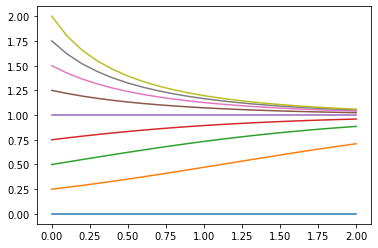

In [6]:
def f(t,y):
    return y*(1-y)

t = np.arange(0,2.1,0.1)

for y0 in np.arange(0,2.25,0.25):
    y = euler(f,t,y0)
    plt.plot(t,y)
    
plt.show()

## My brain is melting haha

In [36]:
import scipy.integrate as spi

Compute the solution of  $y' = -y$ where $y(0)=1$. We know $y(t) = e^{-t}$.

In [8]:
def f(y,t):
    return  -y

t = np.linspace(0,2,100)
y0 = 1
y = spi.odeint(f,y0,t)

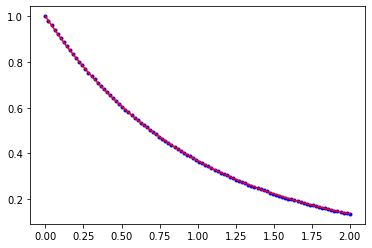

In [11]:
plt.plot(t,y, 'b.')
plt.plot(t,np.exp(-t),'r')

In [38]:
def f(u,t):
    dudt = np.array([0.0,0.0,0.0,0.0])
    dudt[0] = u[1]
    dudt[1] = u[0]**2 - u[2]
    dudt[2] = u[3]
    dudt[3] = u[2] - u[0]
    return dudt

t = np.linspace(0,1,100)
u0 = [1,1,-1,-1]
output = spi.odeint(f,u0,t)

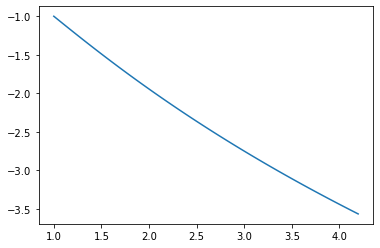

In [39]:
plt.plot(output[:,0],output[:,2])

The above is a plot of x vs y; the output vector u has four columns. The first and third column correspond to x and y, respectively.

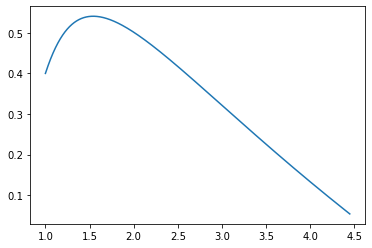

In [34]:
dudt = np.array([0.0,0.0])

def f(u,t):
    dudt[0] = u[0]**2 - u[1]
    dudt[1] = u[1] - u[0] + 1
    return dudt

t = np.linspace(0,1,1000)
u0 = [1,0.4]
u = spi.odeint(f,u0,t)
plt.plot(u[:,0],u[:,1])